# Wine Quality Prediction using Machine Learning

In this project, I build a machine learning model to predict the quality of red wine based on physicochemical features such as acidity, alcohol content, pH level, and more. The model uses a Random Forest Classifier and evaluates performance using accuracy metrics.

# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Importing the dataset

In [2]:
import kagglehub

path  = kagglehub.dataset_download('uciml/red-wine-quality-cortez-et-al-2009')

print('Path to dataset files:', path)

Path to dataset files: /kaggle/input/red-wine-quality-cortez-et-al-2009


In [4]:
import os

for dirname, _, filenames in os.walk('/kaggle/input/red-wine-quality-cortez-et-al-2009'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [5]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

# Data Analysis

In [6]:
# printing the first 5 rows of the dataframe
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# number of rows and columns
wine_dataset.shape

(1599, 12)

In [8]:
# checking for missing values
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [9]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
# number of values for each quality
wine_dataset['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


# Data Visualization

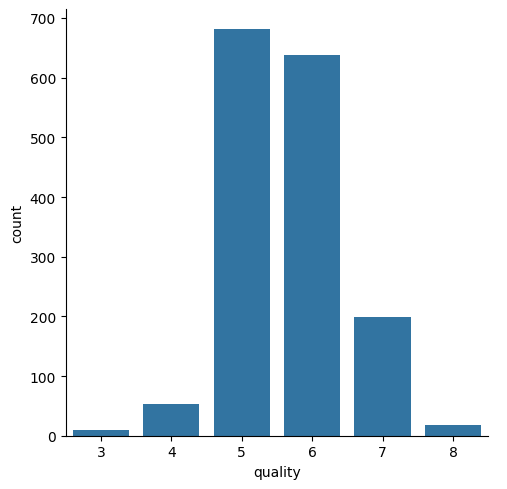

In [11]:
# number of values for each quality
# sns.catplot(x = 'quality', hue = 'quality', data = wine_datase, kind = 'count', palette = 'muted', legend = False) you can use this for better design
sns.catplot(x = 'quality', data = wine_dataset, kind = 'count')

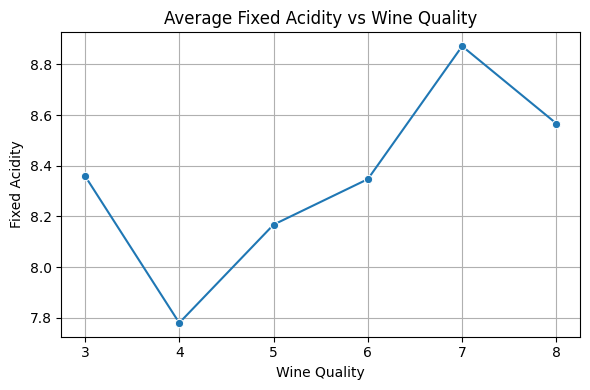

In [12]:
# Compute the mean fixed acidity for each quality level
avg_fixed_acidity = wine_dataset.groupby('quality')['fixed acidity'].mean().reset_index()

# Line plot
plt.figure(figsize=(6,4))
sns.lineplot(x='quality', y='fixed acidity', data=avg_fixed_acidity, marker='o')
plt.title('Average Fixed Acidity vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Fixed Acidity')
plt.grid(True)
plt.tight_layout()
plt.show()

Higher fixed acidity level is required for better wine quality

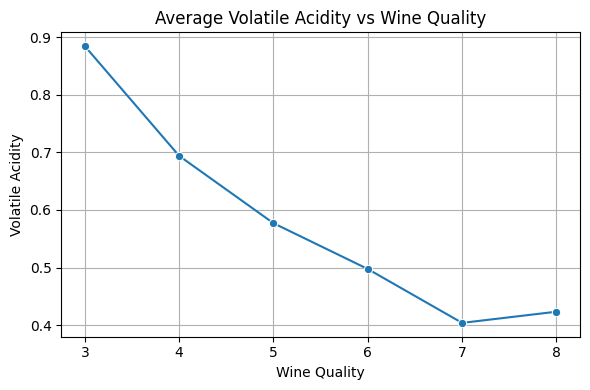

In [13]:
# Compute the mean volatile acidity for each quality level
avg_volatile = wine_dataset.groupby('quality')['volatile acidity'].mean().reset_index()

# Line plot
plt.figure(figsize=(6,4))
sns.lineplot(x='quality', y='volatile acidity', data=avg_volatile, marker='o')
plt.title('Average Volatile Acidity vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Volatile Acidity')
plt.grid(True)
plt.tight_layout()
plt.show()

So, for better wine quality, volatile Acidity should be less

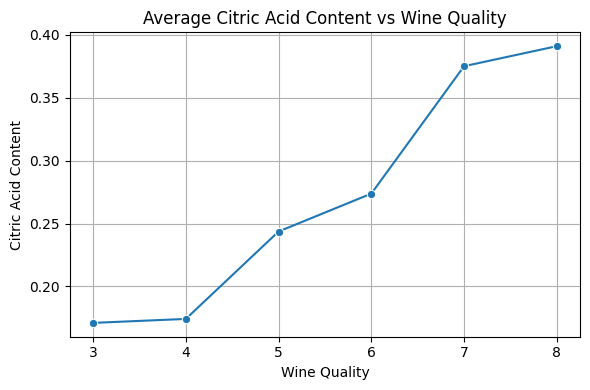

In [14]:
# Compute the mean citric acid content for each quality level
avg_citric_acid = wine_dataset.groupby('quality')['citric acid'].mean().reset_index()

# Line plot
plt.figure(figsize=(6,4))
sns.lineplot(x='quality', y='citric acid', data=avg_citric_acid, marker='o')
plt.title('Average Citric Acid Content vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Citric Acid Content')
plt.grid(True)
plt.tight_layout()
plt.show()

So, increasing the amount of citric acid will increase the wine quality.

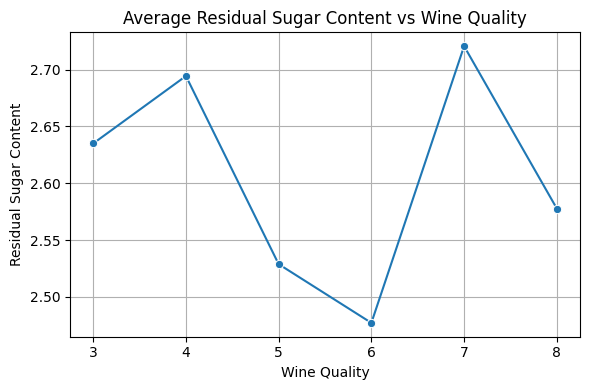

In [15]:
# Compute the mean residual sugar content for each quality level
avg_residual_sugar = wine_dataset.groupby('quality')['residual sugar'].mean().reset_index()

# Line plot
plt.figure(figsize=(6,4))
sns.lineplot(x='quality', y='residual sugar', data=avg_residual_sugar, marker='o')
plt.title('Average Residual Sugar Content vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Residual Sugar Content')
plt.grid(True)
plt.tight_layout()
plt.show()

There are several up downs. So, a conclusion can not be made.

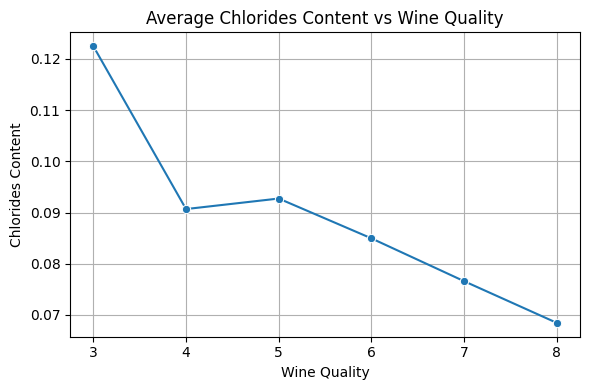

In [16]:
# Compute the mean chlorides content for each quality level
avg_chlorides = wine_dataset.groupby('quality')['chlorides'].mean().reset_index()

# Line plot
plt.figure(figsize=(6,4))
sns.lineplot(x='quality', y='chlorides', data=avg_chlorides, marker='o')
plt.title('Average Chlorides Content vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Chlorides Content')
plt.grid(True)
plt.tight_layout()
plt.show()

So, a low level of chlorides content is required for getting better wine quality.

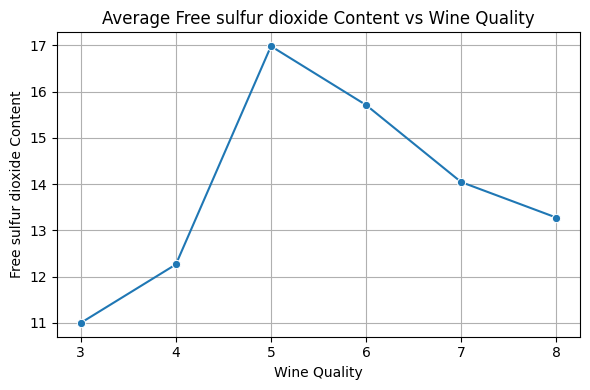

In [17]:
# Compute the mean free sulfur dioxide content for each quality level
avg_free_sulfur_dioxide = wine_dataset.groupby('quality')['free sulfur dioxide'].mean().reset_index()

# Line plot
plt.figure(figsize=(6,4))
sns.lineplot(x='quality', y='free sulfur dioxide', data=avg_free_sulfur_dioxide, marker='o')
plt.title('Average Free sulfur dioxide Content vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Free sulfur dioxide Content')
plt.grid(True)
plt.tight_layout()
plt.show()

An optimum level of free sulfur dioxide content is required for better wine quality.

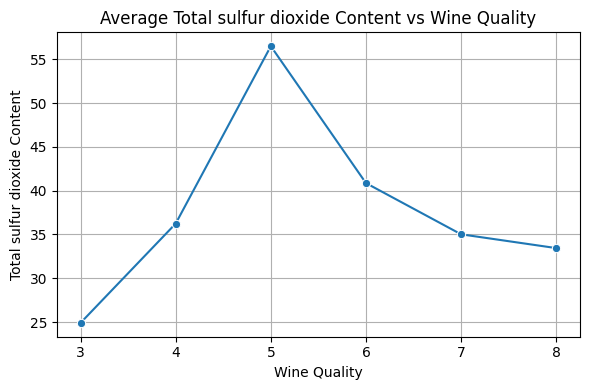

In [18]:
# Compute the mean total sulfur dioxide content for each quality level
avg_total_sulfur_dioxide = wine_dataset.groupby('quality')['total sulfur dioxide'].mean().reset_index()

# Line plot
plt.figure(figsize=(6,4))
sns.lineplot(x='quality', y='total sulfur dioxide', data=avg_total_sulfur_dioxide, marker='o')
plt.title('Average Total sulfur dioxide Content vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Total sulfur dioxide Content')
plt.grid(True)
plt.tight_layout()
plt.show()

An optimum level of total sulfur dioxide content is required for better wine quality.

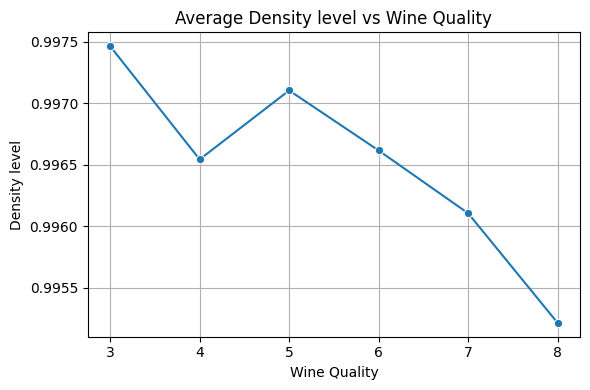

In [19]:
# Compute the mean density level for each quality level
avg_density = wine_dataset.groupby('quality')['density'].mean().reset_index()

# Line plot
plt.figure(figsize=(6,4))
sns.lineplot(x='quality', y='density', data=avg_density, marker='o')
plt.title('Average Density level vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Density level')
plt.grid(True)
plt.tight_layout()
plt.show()

So, a low level of density is required for getting better wine quality.

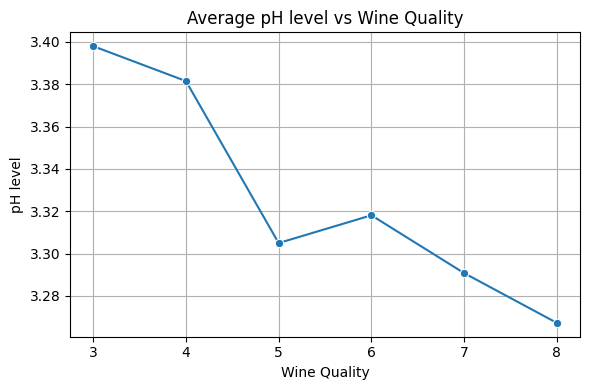

In [20]:
# Compute the mean pH level for each quality level
avg_pH = wine_dataset.groupby('quality')['pH'].mean().reset_index()

# Line plot
plt.figure(figsize=(6,4))
sns.lineplot(x='quality', y='pH', data=avg_pH, marker='o')
plt.title('Average pH level vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('pH level')
plt.grid(True)
plt.tight_layout()
plt.show()

So, a low level of pH is required for getting better wine quality.

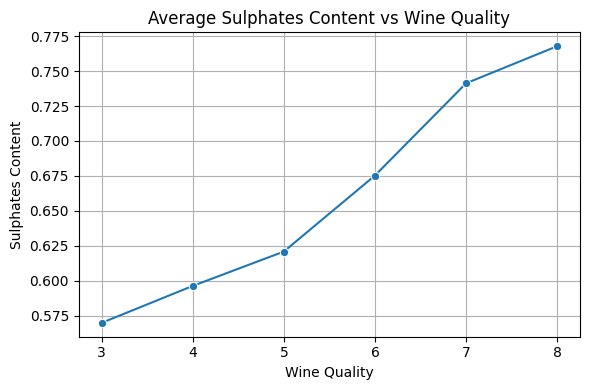

In [21]:
# Compute the mean sulphates content for each quality level
avg_sulphates = wine_dataset.groupby('quality')['sulphates'].mean().reset_index()

# Line plot
plt.figure(figsize=(6,4))
sns.lineplot(x='quality', y='sulphates', data=avg_sulphates, marker='o')
plt.title('Average Sulphates Content vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Sulphates Content')
plt.grid(True)
plt.tight_layout()
plt.show()

So, a high level of sulphates content is required for getting better wine quality.

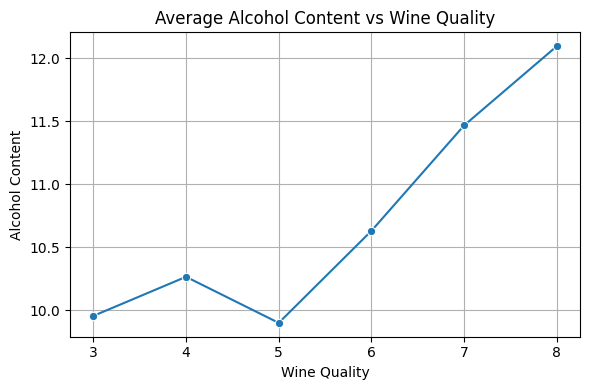

In [22]:
# Compute the mean alcohol content for each quality level
avg_alcohol = wine_dataset.groupby('quality')['alcohol'].mean().reset_index()

# Line plot
plt.figure(figsize=(6,4))
sns.lineplot(x='quality', y='alcohol', data=avg_alcohol, marker='o')
plt.title('Average Alcohol Content vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.grid(True)
plt.tight_layout()
plt.show()

So, a high level of alcohol content is required for getting better wine quality.

In [23]:
correlation = wine_dataset.corr()

<Axes: >

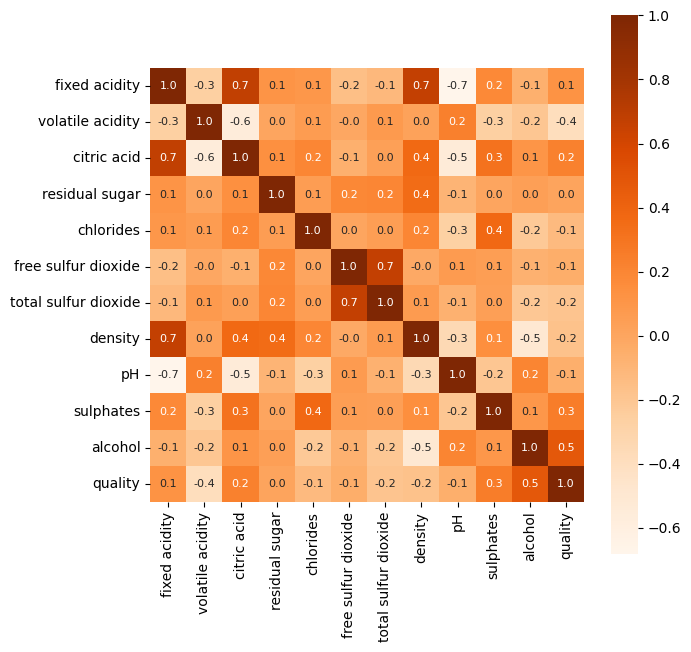

In [24]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(7,7))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Oranges')

# Data Preprocessing

In [25]:
# separate the data and Label
X = wine_dataset.drop('quality', axis = 1)
Y = wine_dataset['quality']

In [26]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [27]:
Y.head()

,quality
0,5
1,5
2,5
3,6
4,5


Label Binarizaton for Y

In [28]:
Y = Y.apply(lambda y_value: 1 if y_value >= 7 else 0)

In [29]:
Y.head()

,quality
0,0
1,0
2,0
3,0
4,0


# Train & Test Split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


# Model Training:

Random Forest Classifier

In [32]:
model = RandomForestClassifier()

In [33]:
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation

Accuracy Score

In [34]:
#Accuracy of training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f'Accuracy of the model on training data is: {training_data_accuracy*100: 0.2f}%')

Accuracy of the model on training data is:  100.00%


In [35]:
#Accuracy of test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f'Accuracy of the model on test data is: {test_data_accuracy*100: 0.2f}%')

Accuracy of the model on test data is:  93.12%


# Making a predictive system

In [36]:
def prediction(n):
  input_n = X_test.iloc[[n]]  # keep as DataFrame with column names

  prediction = model.predict(input_n)

  if prediction == 0:
    print('The wine quality is bad.')
  else:
    print('The wine quality is good.')

  if prediction == Y_test.iloc[n]:
    print('Congratulations! Your model provided accurate result.')
  else:
    print('Warning! The model has made a mistake.')

In [38]:
m = int(input(f'Enter a number between 0 and {Y_test.shape[0]-1}: '))

prediction(m)

Enter a number between 0 and 319: 156
The wine quality is bad.
Congratulations! Your model provided accurate result.
